In [2]:
import os
import sys
import pandas as pd
import numpy as np
import regex as re
from matplotlib import pyplot as plt
import requests as rq

In [3]:
headers = {
'Accept': 'application/json',
}

uri = 'http://rest.genenames.org'
path = '/fetch/symbol/'
gene = 'SYNJ1'

response = rq.get(uri+path+gene, headers=headers)

data = response.json()
print 'Symbol: ' + data['response']['docs'][0]['symbol']
print 'ENSG: ' + data['response']['docs'][0]['ensembl_gene_id']

Symbol: SYNJ1
ENSG: ENSG00000159082


In [4]:
working_dir = "/Users/filippo/Developer/tesi"
os.chdir(working_dir)
files = os.listdir("data_gtex")

In [3]:
len(files)

53

In [6]:
df=pd.read_csv("genes_hugo_symbol.txt", index_col=[0])
df.set_index('Hugo_Symbol', inplace=True)
maxacceptables = 10
added = 0
for i,cfile in enumerate(files):
    if(re.match("[a-zA-Z0-9\-\.]{1,35}[.gz]",cfile)):
        print(cfile)
        cdf = pd.read_csv(("%s/data_gtex/%s"%(working_dir,cfile)), sep='\t', header=[0], index_col=[0], compression='gzip')
        try:
            df = df.combine_first(cdf.loc[:,cdf.keys()[2:]])
            added=added+1
        except:
            print "Unexpected error:", sys.exc_info()[0]
    if added >= maxacceptables:
        break

print(added)

coad-rsem-fpkm-tcga.txt.gz
prostate-rsem-fpkm-gtex.txt.gz
esophagus_mus-rsem-fpkm-gtex.txt.gz
hnsc-rsem-fpkm-tcga-t.txt.gz
thca-rsem-fpkm-tcga-t.txt.gz
hnsc-rsem-fpkm-tcga.txt.gz
esophagus_gas-rsem-fpkm-gtex.txt.gz
prad-rsem-fpkm-tcga-t.txt.gz
kirp-rsem-fpkm-tcga-t.txt.gz
luad-rsem-fpkm-tcga-t.txt.gz
10


In [7]:
df.fillna(value=0., inplace=True)

In [ ]:
# df = pd.read_csv(("%s/mainTable.csv"%working_dir))

In [7]:
#df.columns=['gene', 'breast', 'kidney', 'bronchus', 'brain']

In [8]:
df.head()

,GTEX-111CU-0626-SM-5EGHL,GTEX-111CU-0826-SM-5EGIJ,GTEX-111FC-2026-SM-5GZYO,GTEX-111YS-0826-SM-5GZYK,GTEX-111YS-1026-SM-5GZYE,GTEX-111YS-1726-SM-5GIED,GTEX-1122O-1626-SM-5N9CX,GTEX-1122O-1826-SM-5EGIP,GTEX-113JC-0926-SM-5H114,GTEX-113JC-1026-SM-5H117,...,TCGA-ZG-A9L6-01A-11R-A41O-07,TCGA-ZG-A9LN-01A-11R-A41O-07,TCGA-ZG-A9LS-01A-12R-A41O-07,TCGA-ZG-A9LY-01A-11R-A41O-07,TCGA-ZG-A9LZ-01A-11R-A41O-07,TCGA-ZG-A9M4-01A-11R-A41O-07,TCGA-ZG-A9MC-01A-31R-A41O-07,TCGA-ZG-A9N3-01A-11R-A41O-07,TCGA-ZG-A9ND-01A-11R-A41O-07,TCGA-ZG-A9NI-01A-11R-A41O-07
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
A1BG,76.17,65.72,559.28,86.43,56.68,316.37,327.56,327.56,101.54,88.26,...,249.73,253.23,205.50,127.00,43.94,136.19,285.03,78.34,71.50,172.65
A1CF,0.00,2.51,0.00,1.13,0.00,0.00,0.00,7.11,18.84,0.00,...,1.89,0.00,0.00,0.79,0.74,0.00,0.00,0.00,0.00,70.01
A2M,8963.45,10014.87,2777.33,6337.83,4937.99,7857.29,8479.89,14765.09,13968.57,13492.72,...,22850.48,18689.27,19482.97,8078.22,5995.90,5112.16,14971.21,9540.50,2485.67,8963.45
A2ML1,9.93,9.34,15.56,5.19,6.26,13.83,38.40,5.45,6.78,8.92,...,9.70,29.48,17.64,13.52,17.77,28.04,35.76,7.17,12.74,19.68
A3GALT2,0.00,5.96,0.47,0.00,1.10,0.00,0.00,1.43,0.00,1.43,...,0.00,2.16,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00


In [9]:
print(("genes:%d\trealizations:%d"%(len(df.index),len(df.keys())-1)))

genes:19960	realizations:2636


In [47]:
df.to_csv(("%s/mainTable_TCGAGTex.csv"%working_dir))

In [10]:
gene=df.index[0]
response = rq.get(uri+path+gene, headers=headers)

data = response.json()
print 'Symbol: ' + data['response']['docs'][0]['symbol']
print 'ENSG: ' + data['response']['docs'][0]['locus_group']
print 'ENSG: ' + data['response']['docs'][0]['ensembl_gene_id']

Symbol: A1BG
ENSG: protein-coding gene
ENSG: ENSG00000121410


In [ ]:
import time
ensgs = []
for g in df.index.values:
    try:
        response = rq.get(uri+path+g, headers=headers)
        data = response.json()
        ensgs.append(data['response']['docs'][0]['ensembl_gene_id'])
        print(g, data['response']['docs'][0]['ensembl_gene_id'])
    except:
        df.drop(labels=g, axis=0, inplace=True)
        print("dropped %s"%g)
    time.sleep(0.1)

('A1BG', u'ENSG00000121410')
('A1CF', u'ENSG00000148584')
('A2M', u'ENSG00000175899')
('A2ML1', u'ENSG00000166535')
('A3GALT2', u'ENSG00000184389')
('A4GALT', u'ENSG00000128274')
('A4GNT', u'ENSG00000118017')
('AAAS', u'ENSG00000094914')
('AACS', u'ENSG00000081760')
('AADAC', u'ENSG00000114771')
('AADACL2', u'ENSG00000197953')
('AADACL3', u'ENSG00000188984')
('AADACL4', u'ENSG00000204518')
('AADAT', u'ENSG00000109576')
dropped AAED1
('AAGAB', u'ENSG00000103591')
('AAK1', u'ENSG00000115977')
('AAMDC', u'ENSG00000087884')
('AAMP', u'ENSG00000127837')
('AANAT', u'ENSG00000129673')
('AAR2', u'ENSG00000131043')
('AARD', u'ENSG00000205002')
('AARS', u'ENSG00000090861')
('AARS2', u'ENSG00000124608')
('AARSD1', u'ENSG00000266967')
('AASDH', u'ENSG00000157426')
('AASDHPPT', u'ENSG00000149313')
('AASS', u'ENSG00000008311')
('AATF', u'ENSG00000275700')
('AATK', u'ENSG00000181409')
('ABAT', u'ENSG00000183044')
('ABCA1', u'ENSG00000165029')
('ABCA10', u'ENSG00000154263')
('ABCA12', u'ENSG0000014445

dropped AC138393.1
dropped AC138517.1
dropped AC138647.1
dropped AC138655.1
dropped AC138969.4
dropped AC139100.2
dropped AC139426.2
dropped AC140061.12
dropped AC140481.2
dropped AC142381.1
dropped AC144568.2
dropped AC145676.2
dropped AC174470.1
dropped AC187652.1
dropped AC226150.4
('ACAA1', u'ENSG00000060971')
('ACAA2', u'ENSG00000167315')
('ACACA', u'ENSG00000278540')
('ACACB', u'ENSG00000076555')
('ACAD10', u'ENSG00000111271')
('ACAD11', u'ENSG00000240303')
('ACAD8', u'ENSG00000151498')
('ACAD9', u'ENSG00000177646')
('ACADL', u'ENSG00000115361')
('ACADM', u'ENSG00000117054')
('ACADS', u'ENSG00000122971')
('ACADSB', u'ENSG00000196177')
('ACADVL', u'ENSG00000072778')
('ACAN', u'ENSG00000157766')
('ACAP1', u'ENSG00000072818')
('ACAP2', u'ENSG00000114331')
('ACAP3', u'ENSG00000131584')
('ACAT1', u'ENSG00000075239')
('ACAT2', u'ENSG00000120437')
('ACBD3', u'ENSG00000182827')
('ACBD4', u'ENSG00000181513')
('ACBD5', u'ENSG00000107897')
('ACBD6', u'ENSG00000230124')
('ACBD7', u'ENSG00000

('AFP', u'ENSG00000081051')
('AFTPH', u'ENSG00000119844')
('AGA', u'ENSG00000038002')
('AGAP1', u'ENSG00000157985')
dropped AGAP10
('AGAP2', u'ENSG00000135439')
('AGAP2-AS1', u'ENSG00000255737')
('AGAP3', u'ENSG00000133612')
('AGAP4', u'ENSG00000188234')
('AGAP5', u'ENSG00000172650')
('AGAP6', u'ENSG00000204149')
dropped AGAP7
dropped AGAP8
('AGAP9', u'ENSG00000204172')
('AGBL1', u'ENSG00000273540')
('AGBL2', u'ENSG00000165923')
('AGBL3', u'ENSG00000146856')
('AGBL4', u'ENSG00000186094')
('AGBL5', u'ENSG00000084693')
('AGER', u'ENSG00000204305')
('AGFG1', u'ENSG00000173744')
('AGFG2', u'ENSG00000106351')
('AGGF1', u'ENSG00000164252')
('AGK', u'ENSG00000006530')
('AGL', u'ENSG00000162688')
('AGMAT', u'ENSG00000116771')
('AGMO', u'ENSG00000187546')
('AGO1', u'ENSG00000092847')
('AGO2', u'ENSG00000123908')
('AGO3', u'ENSG00000126070')
('AGO4', u'ENSG00000134698')
('AGPAT1', u'ENSG00000204310')
('AGPAT2', u'ENSG00000169692')
('AGPAT3', u'ENSG00000160216')
('AGPAT4', u'ENSG00000026652')
('A

('AMER2', u'ENSG00000165566')
('AMER3', u'ENSG00000178171')
('AMFR', u'ENSG00000159461')
('AMH', u'ENSG00000104899')
('AMHR2', u'ENSG00000135409')
dropped AMICA1
('AMIGO1', u'ENSG00000181754')
('AMIGO2', u'ENSG00000139211')
('AMIGO3', u'ENSG00000176020')
('AMMECR1', u'ENSG00000101935')
('AMMECR1L', u'ENSG00000144233')
('AMN', u'ENSG00000166126')
('AMN1', u'ENSG00000151743')
('AMOT', u'ENSG00000126016')
('AMOTL1', u'ENSG00000166025')
('AMOTL2', u'ENSG00000114019')
('AMPD1', u'ENSG00000116748')
('AMPD2', u'ENSG00000116337')
('AMPD3', u'ENSG00000133805')
('AMPH', u'ENSG00000078053')
('AMT', u'ENSG00000145020')
('AMTN', u'ENSG00000187689')
('AMY1A', u'ENSG00000237763')
('AMY1B', u'ENSG00000174876')
('AMY1C', u'ENSG00000187733')
('AMY2A', u'ENSG00000243480')
('AMY2B', u'ENSG00000240038')
('AMZ1', u'ENSG00000174945')
('AMZ2', u'ENSG00000196704')
('ANAPC1', u'ENSG00000153107')
('ANAPC10', u'ENSG00000164162')
('ANAPC11', u'ENSG00000141552')
('ANAPC13', u'ENSG00000129055')
('ANAPC15', u'ENSG000

In [56]:
ensgs

[u'ENSG00000121410',
 u'ENSG00000148584',
 u'ENSG00000175899',
 u'ENSG00000166535',
 u'ENSG00000184389',
 u'ENSG00000128274']

## Zipf

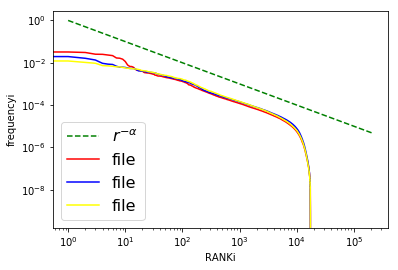

In [52]:
A = [df.loc[:,df.keys()[9]].values, df.loc[:,df.keys()[45]].values, df.loc[:,df.keys()[42]].values]
colors = ['red', 'blue', 'yellow']
fig = plt.figure()
x = np.arange(1, len(A[0]))
plt.ylabel("frequencyi")
plt.xlabel("RANKi")
plt.yscale('log')
plt.xscale('log')
plt.plot(x, 1./x, 'g--', label='$r^{-\\alpha}$')
for i,a in enumerate(A):
    plt.plot(np.sort(a/np.sum(a))[::-1], c=colors[i], label = 'file') 
plt.legend(fontsize=16)
plt.show()